In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1888, 22)
(762, 21)


In [41]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [42]:
train.isnull().sum() # to check for null values in the columns

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [43]:
train.nunique()  # to count unique values in the columns

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [45]:
# distribution of features
for col in list(train.columns):
    print(train[col].value_counts())
    print("*"*50)

1       1
1255    1
1267    1
1266    1
1265    1
       ..
626     1
625     1
624     1
623     1
1888    1
Name: campaign_id, Length: 1888, dtype: int64
**************************************************
3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64
**************************************************
77     53
85     42
82     40
80     39
86     39
       ..
205     1
162     1
225     1
186     1
165     1
Name: subject_len, Length: 170, dtype: int64
**************************************************
19716    7
10473    4
14496    4
9603     4
11378    4
        ..
11915    1
10210    1
16336    1
11772    1
10250    1
Name: body_len, Length: 1568, dtype: int64
**************************************************
26     79
23     72
22     67
19     62
21     61
       ..
4       1
171     1
87      1
107     1
142     1
Name: mean_paragraph_len, Length: 121, dtype: int64


In [46]:
# data pre-processing
train.set_index('campaign_id', inplace = True) # setting 'campaign_id' column as index
train = train.drop(['is_timer'], axis=1) # this column contains only one value
train['times_of_day']=train['times_of_day'].replace({'Noon':0, 'Morning':1, 'Evening':2}) # converting categorical column to numerical column
train['is_price'] = np.where(train['is_price']!=0, 1, 0) # replacing all non-zero values to one in 'is_price' column
train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,0,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
2,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
3,3,59,12801,16,5,1,0,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
4,3,74,11037,30,4,0,2,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
5,3,80,10011,27,5,1,0,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [48]:
# feature engineering
train['paragraph_count'] = train['body_len'] / train['mean_paragraph_len']
train['total_CTA_len'] = train['no_of_CTA'] * train['mean_CTA_len']
train['total_mail_len'] = train['subject_len'] + train['body_len'] + train['total_CTA_len']
train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,paragraph_count,total_CTA_len,total_mail_len
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,0,6,26,3,...,0,0,0,0,0,14,0.103079,267.666667,87,10602
2,3,54,2570,256,5,1,1,2,11,0,...,0,0,0,0,0,10,0.700000,10.039062,0,2624
3,3,59,12801,16,5,1,0,2,11,3,...,1,0,0,0,0,16,0.002769,800.062500,69,12929
4,3,74,11037,30,4,0,2,15,9,4,...,0,0,0,0,0,10,0.010868,367.900000,96,11207
5,3,80,10011,27,5,1,0,6,26,3,...,1,0,0,0,0,14,0.142826,370.777778,93,10184


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


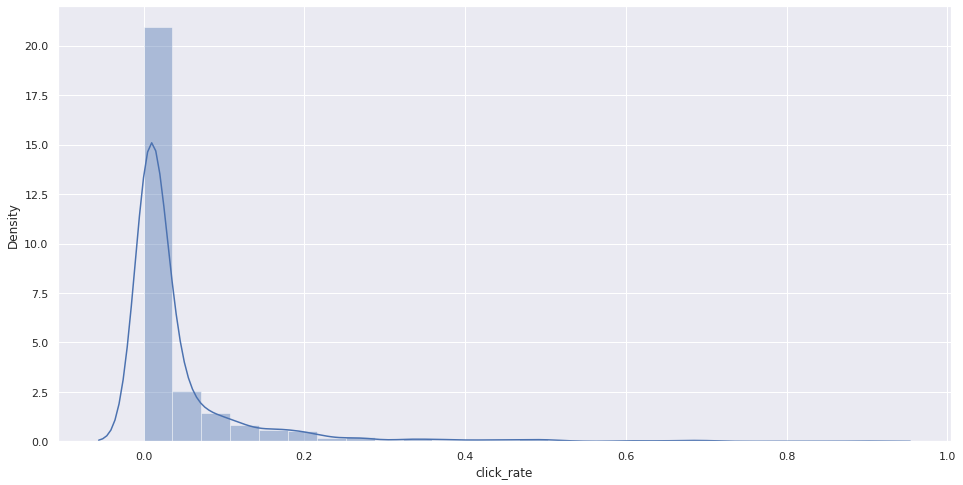

In [49]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.distplot(train.click_rate, bins=25) # univariate analysis for target variable

In [50]:
print("Skewness before : ", train['click_rate'].skew()) # target variable appears to be left-skewed, applying log transformation to reduce it
train['click_rate'] = np.cbrt(train['click_rate'])
print("Skewness after : ", train['click_rate'].skew())

Skewness before :  4.317743085163305
Skewness after :  1.4041389519879213


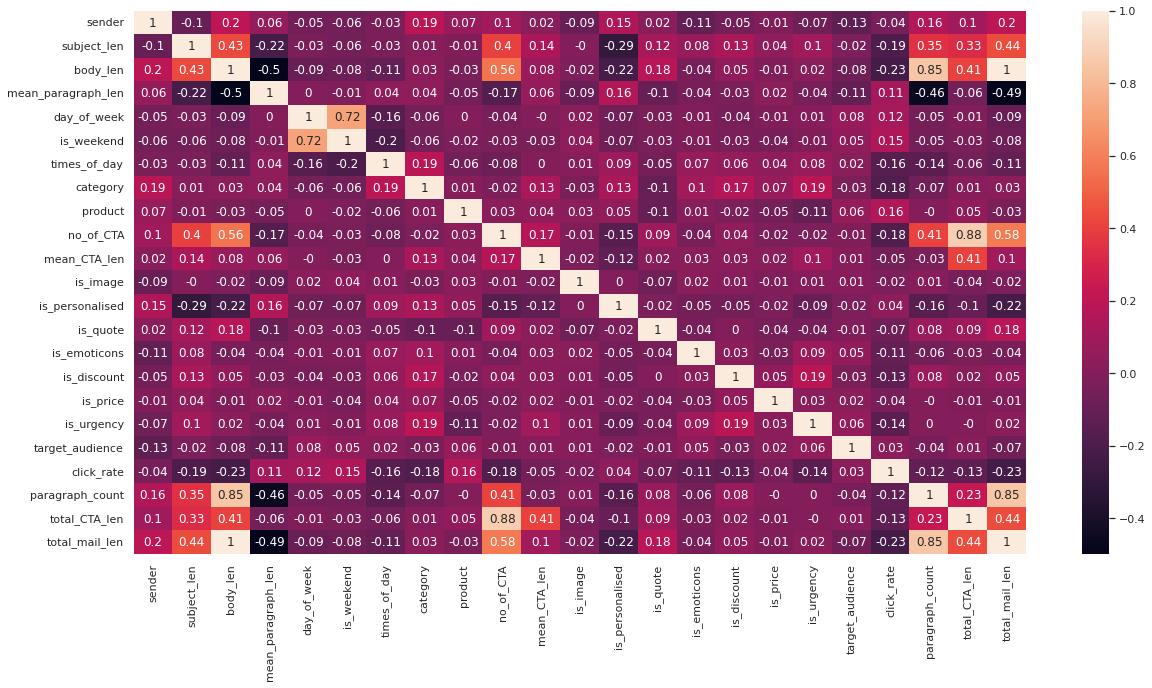

In [51]:
corr_matrix = train.corr().round(2) #finding correlation between features
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data=corr_matrix, annot=True)

In [104]:
from sklearn.model_selection import train_test_split

X = train.drop('click_rate', axis=1)
Y = train['click_rate']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)  #splitting into train and test data by 70-30 ratio

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()           # normalization of column values for regression models

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [106]:
print(x_train.shape)                                                                   
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1321, 22)
(1321,)
(567, 22)
(567,)


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [108]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()    
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)
print("R2 score on test data : ", r2_score(y_test, y_lr))

R2 score on test data :  0.20984297349865


In [109]:
from sklearn.neighbors import KNeighborsRegressor 

params = { 'n_neighbors': (1,10, 1), 'leaf_size': (20,40,1), 'p': (1,2), 'weights': ('uniform', 'distance'), 'metric': ('minkowski', 'chebyshev') }

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator = knn, param_grid = params, cv = 3)
knn_grid.fit(x_train, y_train)

print("Best KNN parameters : ", knn_grid.best_params_)
print("Best KNN score : ", knn_grid.best_score_)

y_knn = knn_grid.predict(x_test)
print("R2 score on test data : ", r2_score(y_test, y_knn))

Best KNN parameters :  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best KNN score :  0.32595856098804993
R2 score on test data :  0.34302931714230256


In [110]:
from sklearn.ensemble import RandomForestRegressor

params = { 'max_depth': [5,7,9,11,13,15], 'n_estimators': [50,60,70,80,90,100]}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = 3)

rf_grid.fit(x_train, y_train)
print("Best Random Forest parameters : ", rf_grid.best_params_)
print("Best Random Forest score : ", rf_grid.best_score_)

y_rf = rf_grid.predict(x_test)
print("R2 score on test data :  ", r2_score(y_test, y_rf))

Best Random Forest parameters :  {'max_depth': 15, 'n_estimators': 70}
Best Random Forest score :  0.4700486078404835
R2 score on test data :   0.5101843857055541


In [111]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'learning_rate': [0.02,0.04,0.06,0.08,0.1],'n_estimators': [100,250,500],'max_depth': [4,6,8] }

gb = GradientBoostingRegressor()
gb_grid = GridSearchCV(estimator = gb, param_grid = params, cv = 3)

gb_grid.fit(x_train, y_train)
print("Best Gradient Boosting parameters : ", gb_grid.best_params_)
print("Best Gradient Boosting score : ", gb_grid.best_score_)

y_gb = gb_grid.predict(x_test)
print("R2 score on test data :  ", r2_score(y_test, y_gb))

Best Gradient Boosting parameters :  {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500}
Best Gradient Boosting score :  0.47311027976363174
R2 score on test data :   0.4882055591468948


In [112]:
from lightgbm import LGBMRegressor

params = {'learning_rate': [0.02,0.04,0.06,0.08,0.1],'n_estimators': [100,250,500],'max_depth': [4,6,8] }

lgb = LGBMRegressor()
lgb_grid = GridSearchCV(estimator = lgb, param_grid = params, cv = 3)

lgb_grid.fit(x_train, y_train)
print("Best Gradient Boosting parameters : ", lgb_grid.best_params_)
print("Best Gradient Boosting score : ", lgb_grid.best_score_)

y_lgb = lgb_grid.predict(x_test)
print("R2 score on test data :  ", r2_score(y_test, y_lgb))

Best Gradient Boosting parameters :  {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 500}
Best Gradient Boosting score :  0.4545987366746162
R2 score on test data :   0.514296597865546


In [113]:
from xgboost import XGBRegressor

params = {'learning_rate':[0.02,0.04,0.06,0.08,0.1], 'n_estimators':[100,250,500], 'max_depth':[4,6,8] }

xgb = XGBRegressor(objective='reg:squarederror')
xgb_grid = GridSearchCV(estimator = xgb, param_grid = params, cv = 3)

xgb_grid.fit(x_train, y_train)
print("Best Gradient Boosting parameters : ", xgb_grid.best_params_)
print("Best Gradient Boosting score : ", xgb_grid.best_score_)

y_xgb = xgb_grid.predict(x_test)
print("R2 score on test data :  ", r2_score(y_test, y_xgb))

Best Gradient Boosting parameters :  {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 250}
Best Gradient Boosting score :  0.4708150900117334
R2 score on test data :   0.44311025492955736


In [114]:
from catboost import CatBoostRegressor

params = { 'depth': [4,6,8], 'iterations': [500,1000,2000], 'learning_rate' : [0.01,0.05,0.1] }

cgb = CatBoostRegressor(verbose = False)
cgb_grid = GridSearchCV(estimator = cgb, param_grid = params, cv = 3)

cgb_grid.fit(x_train, y_train)
print("Best Gradient Boosting parameters : ", cgb_grid.best_params_)
print("Best Gradient Boosting score : ", cgb_grid.best_score_)

y_cgb = cgb_grid.predict(x_test)
print("R2 score on test data :  ", r2_score(y_test, y_cgb))

Best Gradient Boosting parameters :  {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
Best Gradient Boosting score :  0.49348650001118166
R2 score on test data :   0.5280021510246801


In [115]:
from sklearn.ensemble import StackingRegressor

level0 = list()
level0.append(('rf', rf_grid))
level0.append(('lgb', lgb_grid))
level0.append(('cgb', cgb_grid))
level1 = lr

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)

model.fit(x_train, y_train)

y_stack = model.predict(x_test)
print("R2 score on test data : ", r2_score(y_test, y_stack))

R2 score on test data :  0.5413090636864817


In [116]:
# pre-processing test data
test.set_index('campaign_id', inplace = True) 
test = test.drop(['is_timer'], axis=1)
test['times_of_day']=test['times_of_day'].replace({'Noon':0, 'Morning':1, 'Evening':2}) # converting categorical column to numerical column
test['is_price'] = np.where(test['is_price']!=0, 1, 0) # replacing all non-zero values to one in 'is_price' column
test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
campaign_id,,,,,,,,,,,,,,,,,,,
1889,3,61,12871,11,6,1,0,6,26,3,37,1,0,0,1,0,0,0,14
1890,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
1891,3,88,1473,78,4,0,2,2,11,0,22,1,0,1,0,0,0,0,10
1892,3,88,1473,78,3,0,2,2,11,0,22,1,0,1,0,0,0,0,10
1893,3,78,9020,29,3,0,0,6,26,2,40,0,0,0,0,0,0,0,14


In [117]:
# adding new features to test data
test['paragraph_count'] = test['body_len'] / test['mean_paragraph_len']
test['total_CTA_len'] = test['no_of_CTA'] * test['mean_CTA_len']
test['total_mail_len'] = test['subject_len'] + test['body_len'] + test['total_CTA_len']
test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,paragraph_count,total_CTA_len,total_mail_len
campaign_id,,,,,,,,,,,,,,,,,,,,,
1889,3,61,12871,11,6,1,0,6,26,3,...,0,0,1,0,0,0,14,1170.090909,111,13043
1890,3,54,2569,256,5,1,1,2,11,0,...,0,0,0,0,0,0,10,10.035156,0,2623
1891,3,88,1473,78,4,0,2,2,11,0,...,0,1,0,0,0,0,10,18.884615,0,1561
1892,3,88,1473,78,3,0,2,2,11,0,...,0,1,0,0,0,0,10,18.884615,0,1561
1893,3,78,9020,29,3,0,0,6,26,2,...,0,0,0,0,0,0,14,311.034483,80,9178


In [118]:
# getting final predictions on private test data to be submiited using stacking model
test_data = scaler.transform(test)
y_test = model.predict(test_data)
prediction = pd.DataFrame(y_test,columns=['click_rate'])
prediction['campaign_id'] = test.index
prediction.set_index('campaign_id', inplace = True)
prediction.head()

,click_rate
campaign_id,
1889,0.344428
1890,0.618610
1891,0.553739
1892,0.545624
1893,0.507030


In [120]:
prediction.to_csv('submission.csv') # storing obtained results to csv file